#### TEST AN DPREDICIITON FILE

In [5]:
#importing libaries..
import pandas as pd
import numpy as np 
import yfinance as yf
from datetime import date

In [6]:
company_name="AAPL"
ticker=yf.Ticker(company_name)
df=ticker.history(period="5y")

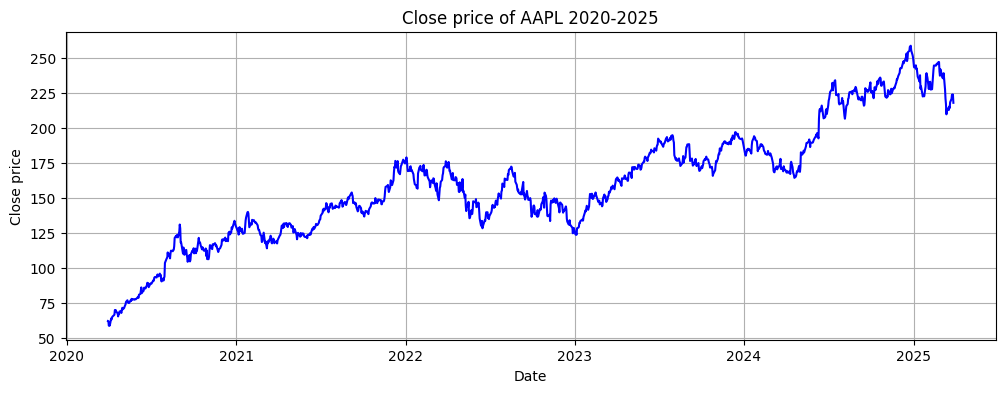

In [7]:
#Visualizing the closing data
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df["Close"],color="blue")
plt.title("Close price of AAPL 2020-2025")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.grid(True)

In [8]:
#scaling the data.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))


In [9]:
# fit transfrom data
scaled_data=scaler.fit_transform(df[['Close']])
scaled_data

array([[0.01684327],
       [0.01621315],
       [0.        ],
       ...,
       [0.81422485],
       [0.82580915],
       [0.79609945]])

In [10]:
#spliting into traning and testing..
traning_size=round(len(scaled_data)*.7)
testing_size=len(scaled_data) - traning_size

traning_data=scaled_data[0:traning_size,:]
testing_data=scaled_data[traning_size:len(scaled_data),:1]

In [11]:
traning_size,testing_size,len(scaled_data)

(880, 377, 1257)

In [12]:
#lets create a function to get the dataframe.

def create_X_y(time_step,data):
    X,y=[],[]
    for i in range(len(data)-time_step-1):
        features=data[i:(time_step + i)]
        target=data[time_step + i]

        X.append(features)
        y.append(target)
    
    return np.array(X),np.array(y)


In [13]:
# train and test data:
time_step=100

X_train,y_train=create_X_y(time_step , traning_data)
X_test,y_test=create_X_y(time_step , testing_data)

In [14]:
# reshaping dependendt features..
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [15]:
X_train.shape,X_test.shape

((779, 100, 1), (276, 100, 1))

In [16]:
# MODEL creating
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [17]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse",optimizer="adam",metrics=['mean_absolute_error'])

p:\stocks-price-predicition\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,verbose=1,batch_size=64)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step - loss: 0.1104 - mean_absolute_error: 0.2903 - val_loss: 0.0777 - val_mean_absolute_error: 0.2680
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - loss: 0.0107 - mean_absolute_error: 0.0871 - val_loss: 0.0084 - val_mean_absolute_error: 0.0798
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 151ms/step - loss: 0.0044 - mean_absolute_error: 0.0538 - val_loss: 0.0260 - val_mean_absolute_error: 0.1456
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 147ms/step - loss: 0.0029 - mean_absolute_error: 0.0447 - val_loss: 0.0267 - val_mean_absolute_error: 0.1492
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - loss: 0.0025 - mean_absolute_error: 0.0410 - val_loss: 0.0165 - val_mean_absolute_error: 0.1137
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 157ms/step - loss: 0.0019 - mean_absolute_error: 0.0356 - val_loss: 0.0092 - val_mean_absolute_error: 0.0818
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step - loss: 0.0017 - mean_absolute_error: 0.0

In [20]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [21]:
from sklearn.metrics import r2_score,root_mean_squared_error

r2_scoing=r2_score(y_true=y_test , y_pred=test_predict)
rms_scoring=root_mean_squared_error(y_true=y_test , y_pred=test_predict)
print("r2 scoing : ",r2_scoing,"rms scoring : ",rms_scoring)

r2 scoing :  0.9390061171834085 rms scoring :  0.03125671427979907


##### The model looks kinds perfoming good so lets use this product.

In [22]:
### SCALER TO REAL
train_predict =scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

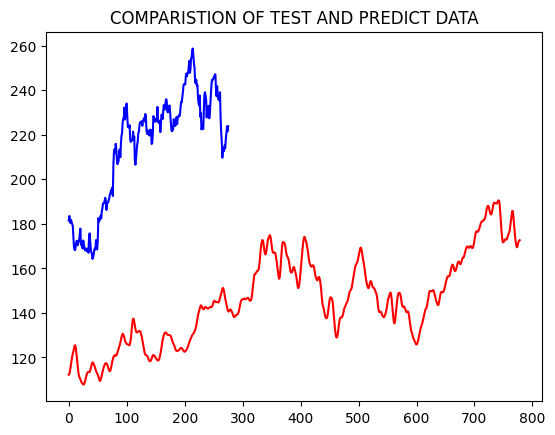

In [23]:
y_test=scaler.inverse_transform(y_test.reshape(-1,1))

plt.title("COMPARISTION OF TEST AND PREDICT DATA")
plt.plot(train_predict,color="red")
plt.plot(y_test,color="blue")
plt.show()

C:\Users\tsaja\AppData\Local\Temp\ipykernel_1920\2446534621.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


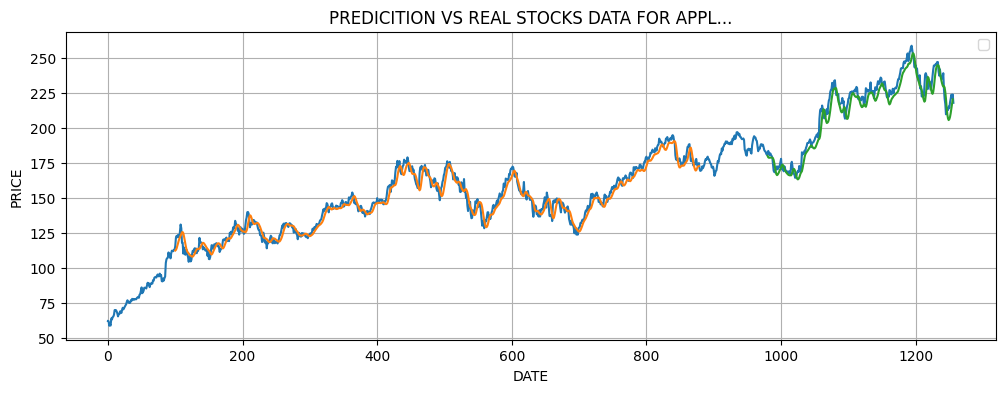

In [24]:

look_back=100
trainPredictPlot = np.empty_like(scaled_data)
trainPredictPlot[:, :]= np.nan
trainPredictPlot [look_back:len(train_predict)+look_back, :] = train_predict 
testPredictPlot=np.empty_like(scaled_data)
testPredictPlot[:,: ] = np.nan
testPredictPlot [len (train_predict)+(look_back*2)+1:len (scaled_data)-1, ] = test_predict

plt.figure(figsize=(12,4))
plt.plot(scaler.inverse_transform(scaled_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title("PREDICITION VS REAL STOCKS DATA FOR APPL...")
plt.legend()
plt.grid(True)
plt.xlabel("DATE")
plt.ylabel("PRICE")
plt.show()

In [28]:
import os
import pickle

dir_path="src\model"
os.chdir("..")
os.makedirs(dir_path,exist_ok=True)

file_path=os.path.join(dir_path,"lstm_model.pkl")

with open(file_path,"wb") as f:
    pickle.dump(model,f)

print(file_path)

src\model\lstm_model.pkl
